In [1]:
# The objective of this analysis is to determine the most productive Indian crops from 1997-2020
# These will be crop which production over the specified period is greater than the mean in term of Area,Production and Yield

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
import seaborn as sns
import os

In [3]:
os.chdir('C:\\Users\Franklin\Desktop\python\Datasets\Crop production India')

In [4]:
df=pd.read_csv(r'India Agriculture Crop Production.csv')
df

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296
...,...,...,...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345403,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345404,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345405,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN


In [5]:
# let's look at the types of data, values and total nber of values not equal to zero for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [6]:
# How many rows with zero value do we have for each variable?
df.isnull().sum()

State                  0
District               0
Crop                  32
Year                   0
Season                 1
Area                  33
Area Units             0
Production          4993
Production Units       0
Yield                 33
dtype: int64

In [7]:
# How many values are unique for each variable
df.nunique()

State                   36
District               729
Crop                    56
Year                    24
Season                   6
Area                 48006
Area Units               1
Production           69078
Production Units         3
Yield               197154
dtype: int64

In [8]:
# I want want all my float numbers to be limited to two digits
pd.set_option('display.float_format', lambda x: '%.2f'%x)
df

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.00,Hectare,2061.00,Tonnes,1.64
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.00,Hectare,2083.00,Tonnes,1.66
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.00,Hectare,1525.00,Tonnes,1.21
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.00,Hectare,5239.00,Tonnes,1.69
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.00,Hectare,5267.00,Tonnes,1.70
...,...,...,...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345403,Manipur,SENAPATI,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345404,Manipur,TAMENGLONG,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN
345405,Manipur,THOUBAL,NaN,2019-20,Rabi,NaN,Hectare,NaN,Tonnes,NaN


In [9]:
#  The best crops will be considered from these data, their value should be above the mean of each variable.
# In this case, I use the period provided by the data (1997-2020)
df.describe()

,Area,Production,Yield
count,345374.00,340414.00,345374.00
mean,11670.19,958371.15,79.41
std,45838.43,21529855.09,916.63
min,0.00,0.00,0.00
25%,74.00,87.00,0.55
50%,532.00,717.00,1.00
75%,4110.00,7176.00,2.47
max,8580100.00,1597800000.00,43958.33


In [10]:
# I clean my data by replacing all missing values by an empty string
df.fillna('', inplace=True)
df

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.00,Hectare,2061.00,Tonnes,1.64
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.00,Hectare,2083.00,Tonnes,1.66
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.00,Hectare,1525.00,Tonnes,1.21
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.00,Hectare,5239.00,Tonnes,1.69
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.00,Hectare,5267.00,Tonnes,1.70
...,...,...,...,...,...,...,...,...,...,...
345402,Manipur,IMPHAL WEST,,2019-20,Rabi,,Hectare,,Tonnes,
345403,Manipur,SENAPATI,,2019-20,Rabi,,Hectare,,Tonnes,
345404,Manipur,TAMENGLONG,,2019-20,Rabi,,Hectare,,Tonnes,
345405,Manipur,THOUBAL,,2019-20,Rabi,,Hectare,,Tonnes,


In [11]:
# I want to set a new index for my data frame


In [12]:
df.set_index('District', inplace=True)
df

,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
District,,,,,,,,,
NICOBARS,Andaman and Nicobar Islands,Arecanut,2001-02,Kharif,1254.00,Hectare,2061.00,Tonnes,1.64
NICOBARS,Andaman and Nicobar Islands,Arecanut,2002-03,Whole Year,1258.00,Hectare,2083.00,Tonnes,1.66
NICOBARS,Andaman and Nicobar Islands,Arecanut,2003-04,Whole Year,1261.00,Hectare,1525.00,Tonnes,1.21
NORTH AND MIDDLE ANDAMAN,Andaman and Nicobar Islands,Arecanut,2001-02,Kharif,3100.00,Hectare,5239.00,Tonnes,1.69
SOUTH ANDAMANS,Andaman and Nicobar Islands,Arecanut,2002-03,Whole Year,3105.00,Hectare,5267.00,Tonnes,1.70
...,...,...,...,...,...,...,...,...,...
IMPHAL WEST,Manipur,,2019-20,Rabi,,Hectare,,Tonnes,
SENAPATI,Manipur,,2019-20,Rabi,,Hectare,,Tonnes,
TAMENGLONG,Manipur,,2019-20,Rabi,,Hectare,,Tonnes,


In [13]:
# I want to sort my data base on value i got in the description above
# Direct method by applying this formula 'Area = df[df['Area'] > 11670.19]' did not work, i had to ask chat gpt to help me, 
# it gave me the below formula before the direct method could work. I used it for 'Area','Production' and 'Yield' data
df['Area'] = pd.to_numeric(df['Area'] , errors='coerce') 


In [14]:

Area = df[df['Area'] > 11670.19]
Area 


,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
District,,,,,,,,,
NICOBARS,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,18190.00,Hectare,64430000.00,Nuts,3542.06
NICOBARS,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,18240.00,Hectare,67490000.00,Nuts,3700.11
NICOBARS,Andaman and Nicobar Islands,Coconut,2003-04,Whole Year,18284.74,Hectare,68580000.00,Nuts,3750.67
ADILABAD,Andhra Pradesh,Arhar/Tur,2001-02,Kharif,38438.00,Hectare,18027.00,Tonnes,0.47
ADILABAD,Andhra Pradesh,Arhar/Tur,2002-03,Kharif,40771.00,Hectare,9989.00,Tonnes,0.25
...,...,...,...,...,...,...,...,...,...
MURSHIDABAD,West Bengal,Wheat,2000-01,Rabi,135506.00,Hectare,373460.00,Tonnes,2.76
NADIA,West Bengal,Wheat,1997-98,Rabi,52176.00,Hectare,117720.00,Tonnes,2.26
NADIA,West Bengal,Wheat,1998-99,Rabi,52147.00,Hectare,112510.00,Tonnes,2.16


In [15]:
df['Production']=pd.to_numeric(df['Production'], errors='coerce')
Production= df[df['Production']>958371.15]
Production

,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
District,,,,,,,,,
NICOBARS,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,18190.00,Hectare,64430000.00,Nuts,3542.06
NICOBARS,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,18240.00,Hectare,67490000.00,Nuts,3700.11
NICOBARS,Andaman and Nicobar Islands,Coconut,2003-04,Whole Year,18284.74,Hectare,68580000.00,Nuts,3750.67
NORTH AND MIDDLE ANDAMAN,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,7015.00,Hectare,25250000.00,Nuts,3599.43
SOUTH ANDAMANS,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,7060.00,Hectare,26830000.00,Nuts,3800.28
...,...,...,...,...,...,...,...,...,...
PURBA BARDHAMAN,West Bengal,Potato,2000-01,Whole Year,42147.00,Hectare,1114960.00,Tonnes,26.45
BANKURA,West Bengal,Rice,1997-98,Winter,354447.00,Hectare,973590.00,Tonnes,2.75
PURBA BARDHAMAN,West Bengal,Rice,1997-98,Winter,417834.00,Hectare,1146060.00,Tonnes,2.74


In [16]:
df['Yield']=pd.to_numeric(df['Yield'], errors='coerce')
Yield=df[df['Yield']>79.41]
Yield

,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
District,,,,,,,,,
NICOBARS,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,18190.00,Hectare,64430000.00,Nuts,3542.06
NICOBARS,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,18240.00,Hectare,67490000.00,Nuts,3700.11
NICOBARS,Andaman and Nicobar Islands,Coconut,2003-04,Whole Year,18284.74,Hectare,68580000.00,Nuts,3750.67
NORTH AND MIDDLE ANDAMAN,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,7015.00,Hectare,25250000.00,Nuts,3599.43
SOUTH ANDAMANS,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,7060.00,Hectare,26830000.00,Nuts,3800.28
...,...,...,...,...,...,...,...,...,...
MEDINIPUR WEST,West Bengal,Sugarcane,1998-99,Whole Year,5073.00,Hectare,485550.00,Tonnes,95.71
MEDINIPUR WEST,West Bengal,Sugarcane,1999-00,Whole Year,4609.00,Hectare,503662.00,Tonnes,109.28
PURULIA,West Bengal,Sugarcane,1997-98,Whole Year,500.00,Hectare,42230.00,Tonnes,84.46


In [17]:
# After sorting each variable, i used the merge method to exactly obtain crop which 'Yield','Area' and 'production' were 
# superior to the mean. This first formula worked
best_yp=Yield.merge(Production, how='inner')
best_yp

,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,18190.00,Hectare,64430000.00,Nuts,3542.06
1,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,18240.00,Hectare,67490000.00,Nuts,3700.11
2,Andaman and Nicobar Islands,Coconut,2003-04,Whole Year,18284.74,Hectare,68580000.00,Nuts,3750.67
3,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,7015.00,Hectare,25250000.00,Nuts,3599.43
4,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,7060.00,Hectare,26830000.00,Nuts,3800.28
...,...,...,...,...,...,...,...,...,...
3168,West Bengal,Coconut,2000-01,Whole Year,772.00,Hectare,11611700.00,Nuts,15041.06
3169,West Bengal,Coconut,1997-98,Whole Year,1935.00,Hectare,26993300.00,Nuts,13950.03
3170,West Bengal,Coconut,1998-99,Whole Year,1940.00,Hectare,27645000.00,Nuts,14250.00
3171,West Bengal,Coconut,1999-00,Whole Year,1945.00,Hectare,28202500.00,Nuts,14500.00


In [18]:
best_yp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3173 entries, 0 to 3172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             3173 non-null   object 
 1   Crop              3173 non-null   object 
 2   Year              3173 non-null   object 
 3   Season            3173 non-null   object 
 4   Area              3173 non-null   float64
 5   Area Units        3173 non-null   object 
 6   Production        3173 non-null   float64
 7   Production Units  3173 non-null   object 
 8   Yield             3173 non-null   object 
dtypes: float64(2), object(7)
memory usage: 247.9+ KB


In [19]:
#  The below formula did not work, for reason i do not know data type of 'Production' for area changed to object.
#  It failed to be converted to float, i had to convert into object using the new variable 'best_yp'
# best_ypa=best_yp.merge('Area ', how='inner')

In [20]:
best_yp['Production']=best_yp['Production'].astype(object)
best_yp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3173 entries, 0 to 3172
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             3173 non-null   object 
 1   Crop              3173 non-null   object 
 2   Year              3173 non-null   object 
 3   Season            3173 non-null   object 
 4   Area              3173 non-null   float64
 5   Area Units        3173 non-null   object 
 6   Production        3173 non-null   object 
 7   Production Units  3173 non-null   object 
 8   Yield             3173 non-null   object 
dtypes: float64(1), object(8)
memory usage: 247.9+ KB


In [21]:
best_ypa=best_yp.merge(Area, how='inner')
best_ypa

,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,18190.00,Hectare,64430000.00,Nuts,3542.06
1,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,18240.00,Hectare,67490000.00,Nuts,3700.11
2,Andaman and Nicobar Islands,Coconut,2003-04,Whole Year,18284.74,Hectare,68580000.00,Nuts,3750.67
3,Andhra Pradesh,Coconut,2001-02,Whole Year,48515.00,Hectare,629772990.00,Nuts,12981.00
4,Andhra Pradesh,Coconut,2002-03,Whole Year,49479.00,Hectare,685943720.00,Nuts,13863.33
...,...,...,...,...,...,...,...,...,...
1272,Tamil Nadu,Sugarcane,1999-00,Whole Year,30528.00,Hectare,2660060.00,Tonnes,87.14
1273,Tamil Nadu,Sugarcane,2000-01,Whole Year,26879.00,Hectare,2342104.00,Tonnes,87.14
1274,Tamil Nadu,Sugarcane,1998-99,Whole Year,44737.00,Hectare,4995600.00,Tonnes,111.67
1275,Tamil Nadu,Sugarcane,1999-00,Whole Year,42884.00,Hectare,4668718.00,Tonnes,108.87


In [22]:
#  I am checking the data obained after merging  
best_ypa.nunique()

State                 16
Crop                   3
Year                  24
Season                 2
Area                1238
Area Units             1
Production          1219
Production Units       2
Yield               1270
dtype: int64

In [23]:
# There is no missing dada
best_ypa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1277 entries, 0 to 1276
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             1277 non-null   object 
 1   Crop              1277 non-null   object 
 2   Year              1277 non-null   object 
 3   Season            1277 non-null   object 
 4   Area              1277 non-null   float64
 5   Area Units        1277 non-null   object 
 6   Production        1277 non-null   object 
 7   Production Units  1277 non-null   object 
 8   Yield             1277 non-null   object 
dtypes: float64(1), object(8)
memory usage: 99.8+ KB


In [24]:
# The conversion into float of the main data was a success
best_ypa['Production']=best_ypa['Production'].astype(float)

best_ypa['Yield']=best_ypa['Yield'].astype(float)

In [25]:
# Sorting of the main data frame was also a success. Now we have a new data which values 
# are superior to the mean of of initial data frame
best_ypa.describe()

,Area,Production,Yield
count,1277.00,1277.00,1277.00
mean,47005.71,212637065.20,4987.43
std,39317.10,276550764.39,5085.67
min,11671.00,958380.00,79.47
25%,17882.00,4439800.00,99.37
50%,30762.00,98000000.00,4777.24
75%,61890.00,319823000.00,7671.88
max,248135.00,1597800000.00,29772.00


In [26]:
# By using the grouping method, i can have information on the the crop types and mean values for 1997-2020 period 
best_ypaX=best_ypa.groupby('Crop').mean()
best_ypaX

,Area,Production,Yield
Crop,,,
Banana,14422.00,1186511.00,82.07
Coconut,44581.96,347231446.84,8154.71
Sugarcane,50892.87,4861575.87,97.78


In [27]:
# data vizualization could only be perform for single variable, i only took one case 
# since others can be done using the same method 
best_ypaX=best_ypa.groupby('Crop').mean()
best_ypaX=best_ypaX.drop(columns=['Yield','Production'])
best_ypaX

,Area
Crop,
Banana,14422.00
Coconut,44581.96
Sugarcane,50892.87


<AxesSubplot: xlabel='crop_types', ylabel='Surface_Area(Ha)'>

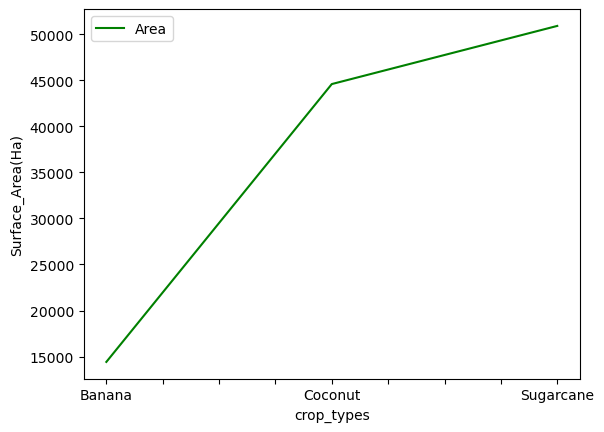

In [28]:
best_ypaX.plot(kind='line', xlabel='crop_types', ylabel='Surface_Area(Ha)', c='green' )

<AxesSubplot: ylabel='Crop'>

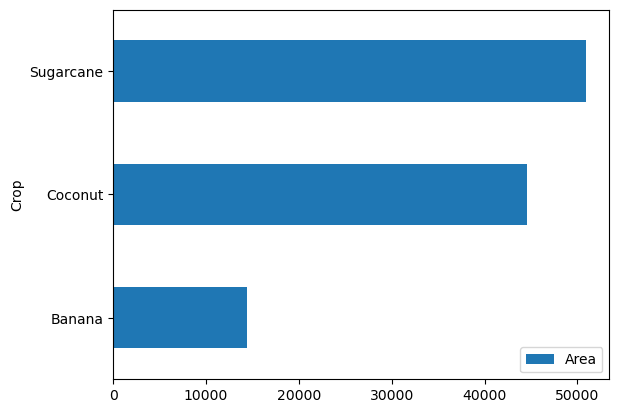

In [29]:
best_ypaX.plot.barh()

In [30]:
# Still for the purpose of vizualization i sorted 'Production Units' of best_ypa 
best_ypa_t= best_ypa[best_ypa['Production Units'].isin(['Tonnes'])]
best_ypa_t

,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
12,Andhra Pradesh,Sugarcane,2001-02,Whole Year,38789.00,Hectare,3337250.00,Tonnes,86.04
13,Andhra Pradesh,Sugarcane,2001-02,Whole Year,14255.00,Hectare,1282665.00,Tonnes,89.98
14,Andhra Pradesh,Sugarcane,2002-03,Whole Year,15425.00,Hectare,1269570.00,Tonnes,82.31
15,Andhra Pradesh,Sugarcane,2003-04,Whole Year,16285.00,Hectare,1397774.00,Tonnes,85.83
16,Andhra Pradesh,Sugarcane,2002-03,Whole Year,15203.00,Hectare,1535260.00,Tonnes,100.98
...,...,...,...,...,...,...,...,...,...
1272,Tamil Nadu,Sugarcane,1999-00,Whole Year,30528.00,Hectare,2660060.00,Tonnes,87.14
1273,Tamil Nadu,Sugarcane,2000-01,Whole Year,26879.00,Hectare,2342104.00,Tonnes,87.14
1274,Tamil Nadu,Sugarcane,1998-99,Whole Year,44737.00,Hectare,4995600.00,Tonnes,111.67
1275,Tamil Nadu,Sugarcane,1999-00,Whole Year,42884.00,Hectare,4668718.00,Tonnes,108.87


In [31]:
best_ypa_n= best_ypa[best_ypa['Production Units'].isin(['Nuts'])]
best_ypa_n

,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,18190.00,Hectare,64430000.00,Nuts,3542.06
1,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,18240.00,Hectare,67490000.00,Nuts,3700.11
2,Andaman and Nicobar Islands,Coconut,2003-04,Whole Year,18284.74,Hectare,68580000.00,Nuts,3750.67
3,Andhra Pradesh,Coconut,2001-02,Whole Year,48515.00,Hectare,629772990.00,Nuts,12981.00
4,Andhra Pradesh,Coconut,2002-03,Whole Year,49479.00,Hectare,685943720.00,Nuts,13863.33
...,...,...,...,...,...,...,...,...,...
1219,Kerala,Coconut,2000-01,Whole Year,88663.00,Hectare,635000000.00,Nuts,7161.95
1220,Kerala,Coconut,1997-98,Whole Year,76656.00,Hectare,491000000.00,Nuts,6405.24
1221,Kerala,Coconut,1998-99,Whole Year,81171.00,Hectare,534000000.00,Nuts,6578.70
1222,Kerala,Coconut,1999-00,Whole Year,88307.00,Hectare,610000000.00,Nuts,6907.72


In [32]:
best_ypa_n['Year'].unique()

array(['2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07',
       '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13',
       '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19',
       '2019-20', '2000-01', '1998-99', '1999-00', '1997-98'],
      dtype=object)

In [33]:
# Production in tonnes
best_ypa_t.groupby('Crop').mean()

,Area,Production,Yield
Crop,,,
Banana,14422.00,1186511.00,82.07
Sugarcane,50892.87,4861575.87,97.78


In [34]:
# Production in Nuts
best_ypa_n.groupby('Crop').mean()

,Area,Production,Yield
Crop,,,
Coconut,44581.96,347231446.84,8154.71


In [35]:
best_ypa

,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,18190.00,Hectare,64430000.00,Nuts,3542.06
1,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,18240.00,Hectare,67490000.00,Nuts,3700.11
2,Andaman and Nicobar Islands,Coconut,2003-04,Whole Year,18284.74,Hectare,68580000.00,Nuts,3750.67
3,Andhra Pradesh,Coconut,2001-02,Whole Year,48515.00,Hectare,629772990.00,Nuts,12981.00
4,Andhra Pradesh,Coconut,2002-03,Whole Year,49479.00,Hectare,685943720.00,Nuts,13863.33
...,...,...,...,...,...,...,...,...,...
1272,Tamil Nadu,Sugarcane,1999-00,Whole Year,30528.00,Hectare,2660060.00,Tonnes,87.14
1273,Tamil Nadu,Sugarcane,2000-01,Whole Year,26879.00,Hectare,2342104.00,Tonnes,87.14
1274,Tamil Nadu,Sugarcane,1998-99,Whole Year,44737.00,Hectare,4995600.00,Tonnes,111.67
1275,Tamil Nadu,Sugarcane,1999-00,Whole Year,42884.00,Hectare,4668718.00,Tonnes,108.87


In [36]:
x_coconut=best_ypa[best_ypa['Crop'].isin(['Coconut'])]
x_coconut
# best_ypa[best_ypa.Crop=='Coconut']


,State,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,Coconut,2001-02,Whole Year,18190.00,Hectare,64430000.00,Nuts,3542.06
1,Andaman and Nicobar Islands,Coconut,2002-03,Whole Year,18240.00,Hectare,67490000.00,Nuts,3700.11
2,Andaman and Nicobar Islands,Coconut,2003-04,Whole Year,18284.74,Hectare,68580000.00,Nuts,3750.67
3,Andhra Pradesh,Coconut,2001-02,Whole Year,48515.00,Hectare,629772990.00,Nuts,12981.00
4,Andhra Pradesh,Coconut,2002-03,Whole Year,49479.00,Hectare,685943720.00,Nuts,13863.33
...,...,...,...,...,...,...,...,...,...
1219,Kerala,Coconut,2000-01,Whole Year,88663.00,Hectare,635000000.00,Nuts,7161.95
1220,Kerala,Coconut,1997-98,Whole Year,76656.00,Hectare,491000000.00,Nuts,6405.24
1221,Kerala,Coconut,1998-99,Whole Year,81171.00,Hectare,534000000.00,Nuts,6578.70
1222,Kerala,Coconut,1999-00,Whole Year,88307.00,Hectare,610000000.00,Nuts,6907.72


In [37]:
Coconut_YA= x_coconut.drop(columns=['Production Units', 'Season', 'Area Units', 'State','Production', 'Yield'])
CoconutYA=Coconut_YA.groupby('Year').sum()
CoconutYA

,Area
Year,
1997-98,874865.00
1998-99,1177460.00
1999-00,1215946.00
2000-01,1345209.00
2001-02,1371738.00
2002-03,1626682.00
2003-04,1620424.74
2004-05,1632313.70
2005-06,1647242.57


In [38]:
x_banana=best_ypa[best_ypa['Crop'].isin(['Banana'])]
Banana_YA= x_banana.drop(columns=['Production Units', 'Season', 'Area Units', 'State','Production', 'Yield'])
BananaYA=Banana_YA.groupby('Year').sum()
BananaYA

,Area
Year,
2013-14,17000.00
2018-19,11844.00


In [39]:
x_Sugarcane=best_ypa[best_ypa['Crop'].isin(['Sugarcane'])]
Sugarcane_YA= x_Sugarcane.drop(columns=['Production Units', 'Season', 'Area Units', 'State','Production', 'Yield'])
SugarcaneYA=Sugarcane_YA.groupby('Year').sum()
SugarcaneYA

,Area
Year,
1997-98,284993.00
1998-99,784531.00
1999-00,1027428.00
2000-01,937980.00
2001-02,664031.00
2002-03,543545.00
2003-04,187633.00
2004-05,380214.00
2005-06,850431.00


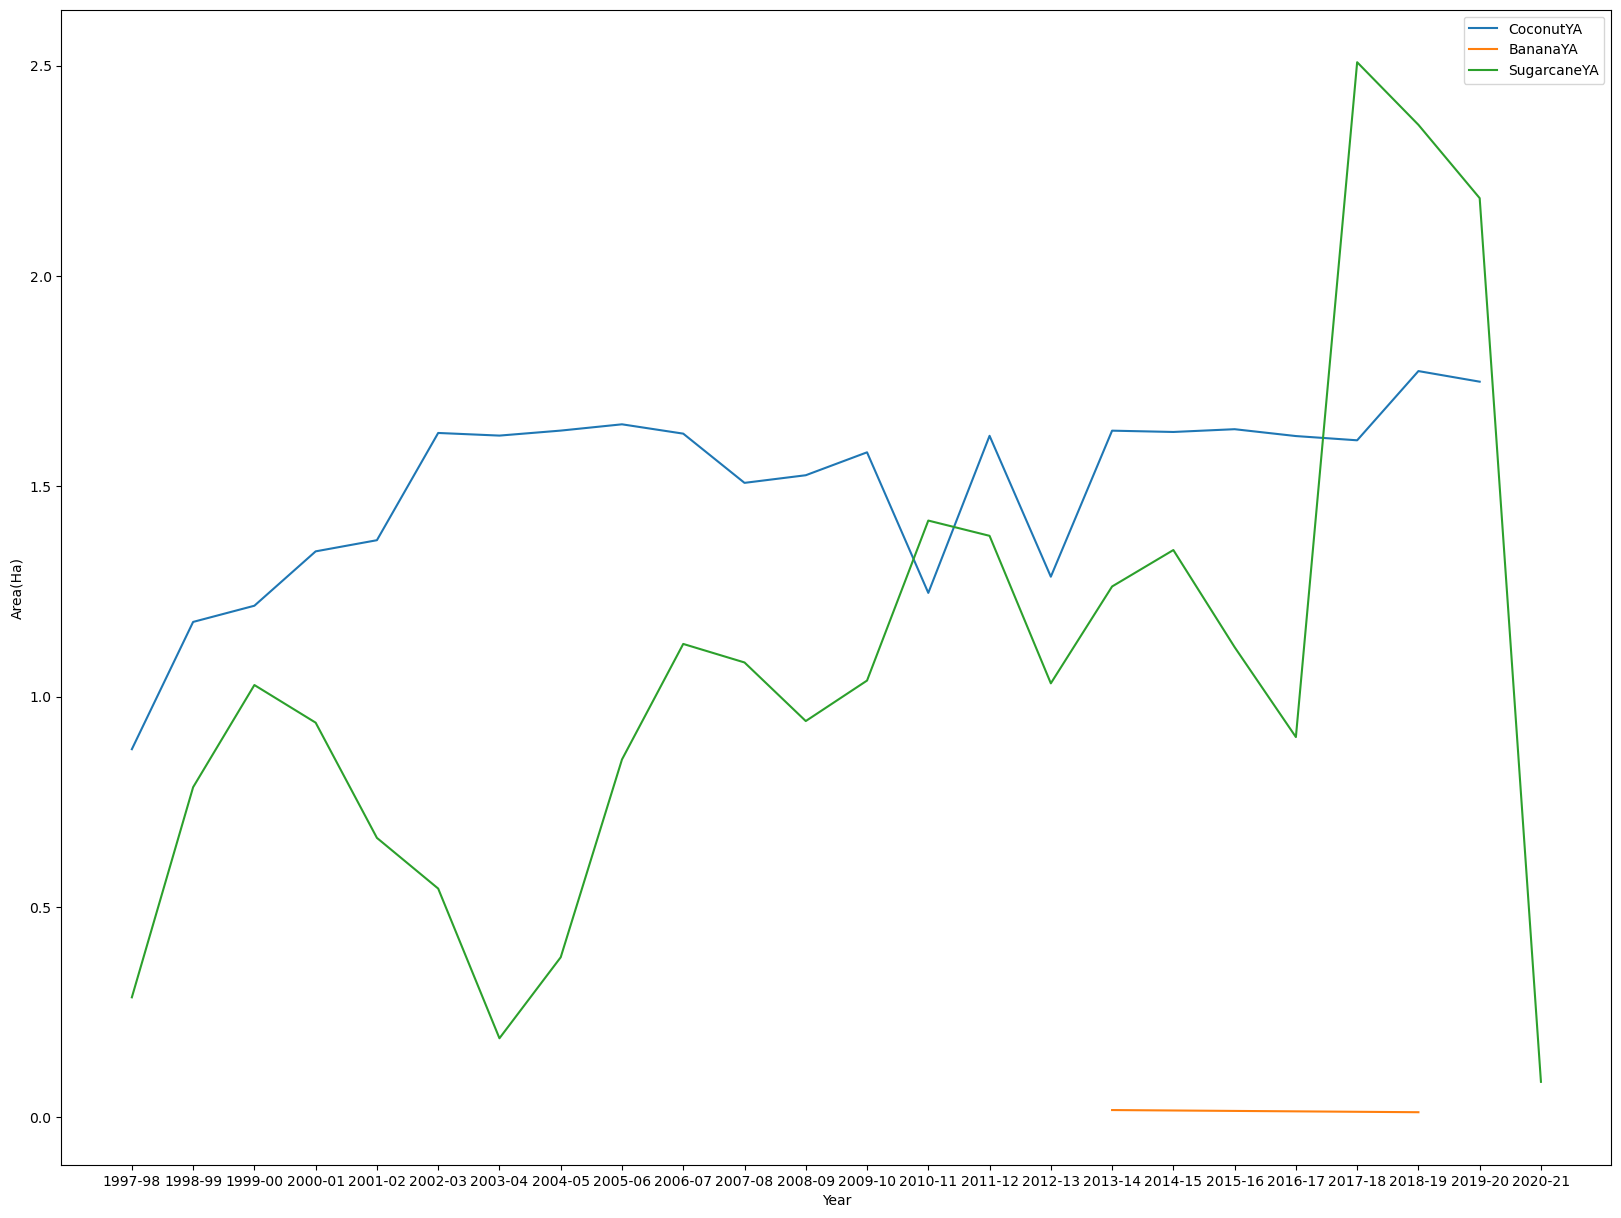

In [66]:
plt.plot(CoconutYA/10**6)
plt.plot(BananaYA/10**6 )
plt.plot(SugarcaneYA/10**6 )
plt.legend(['CoconutYA','BananaYA', 'SugarcaneYA'])
plt.xlabel( 'Year') 
plt.ylabel('Area(Ha)')
plt.rcParams['figure.figsize']=(25,15)
plt.show()



<AxesSubplot: ylabel='Year'>

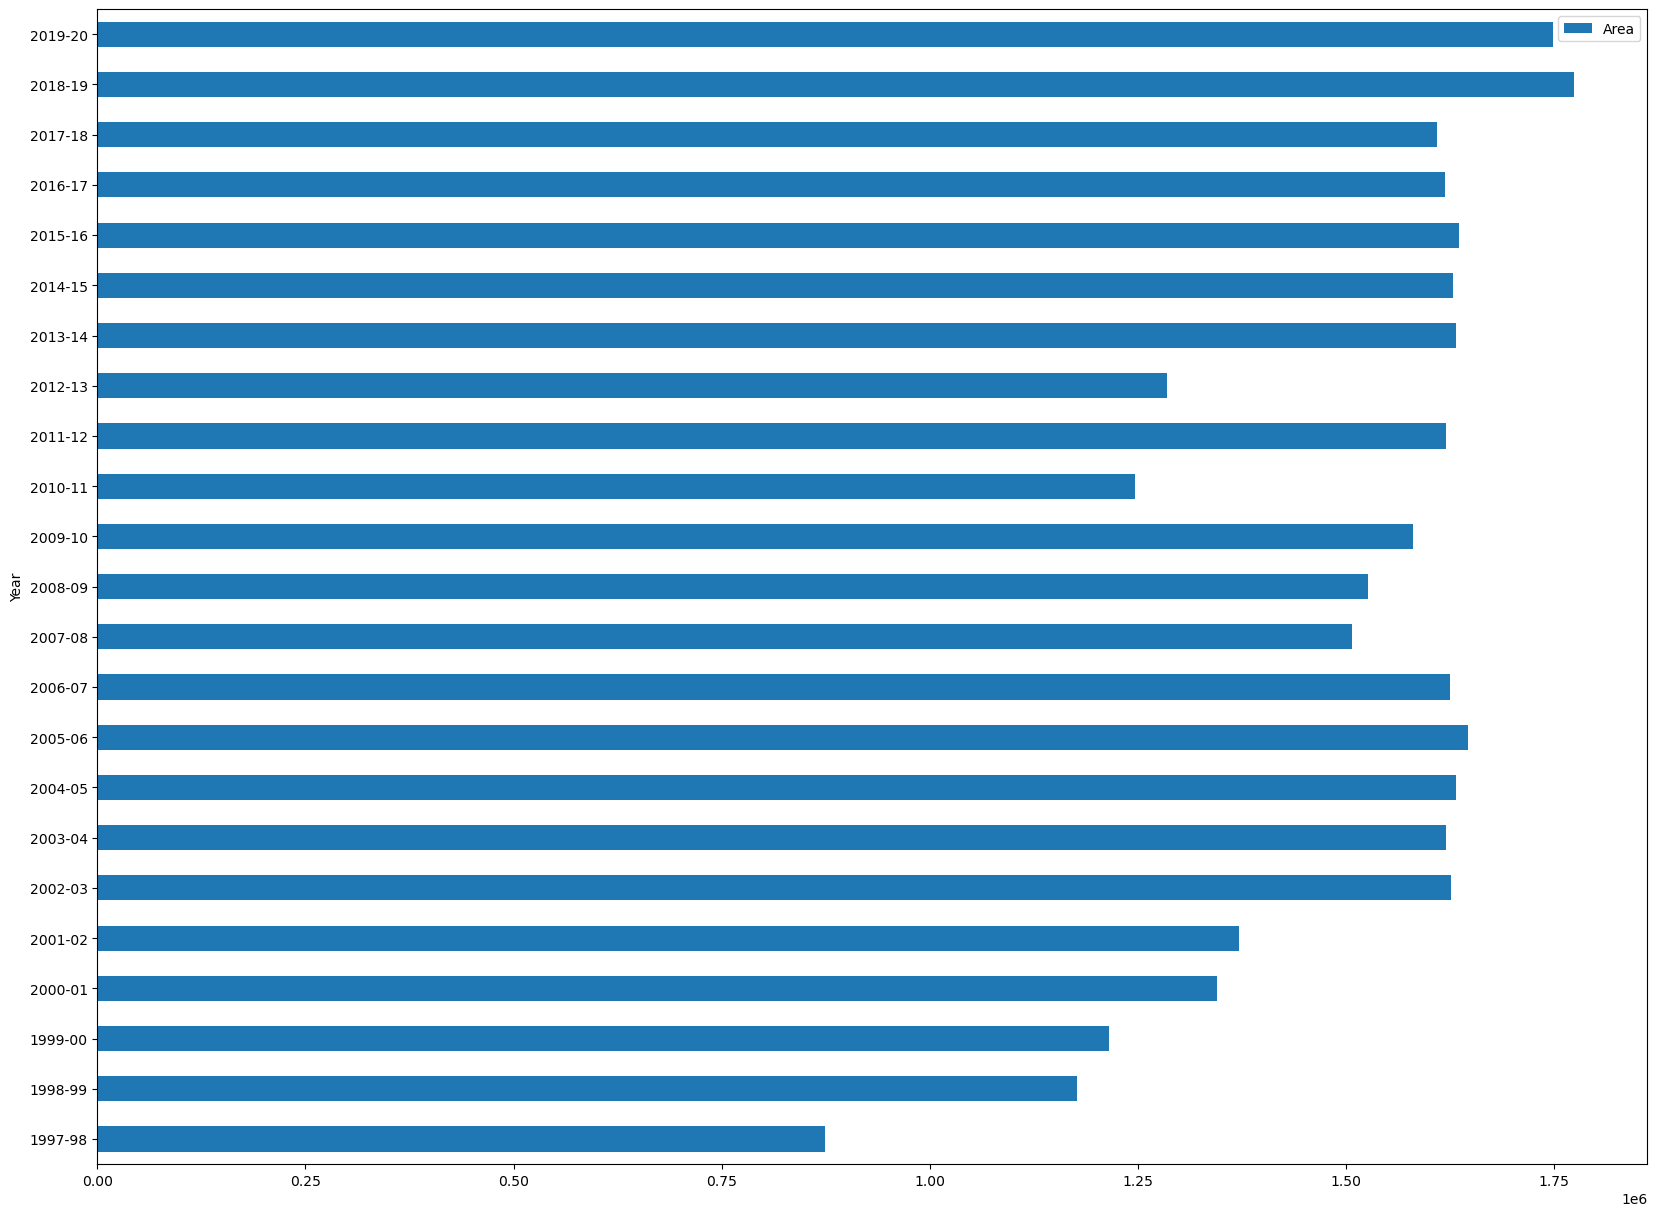

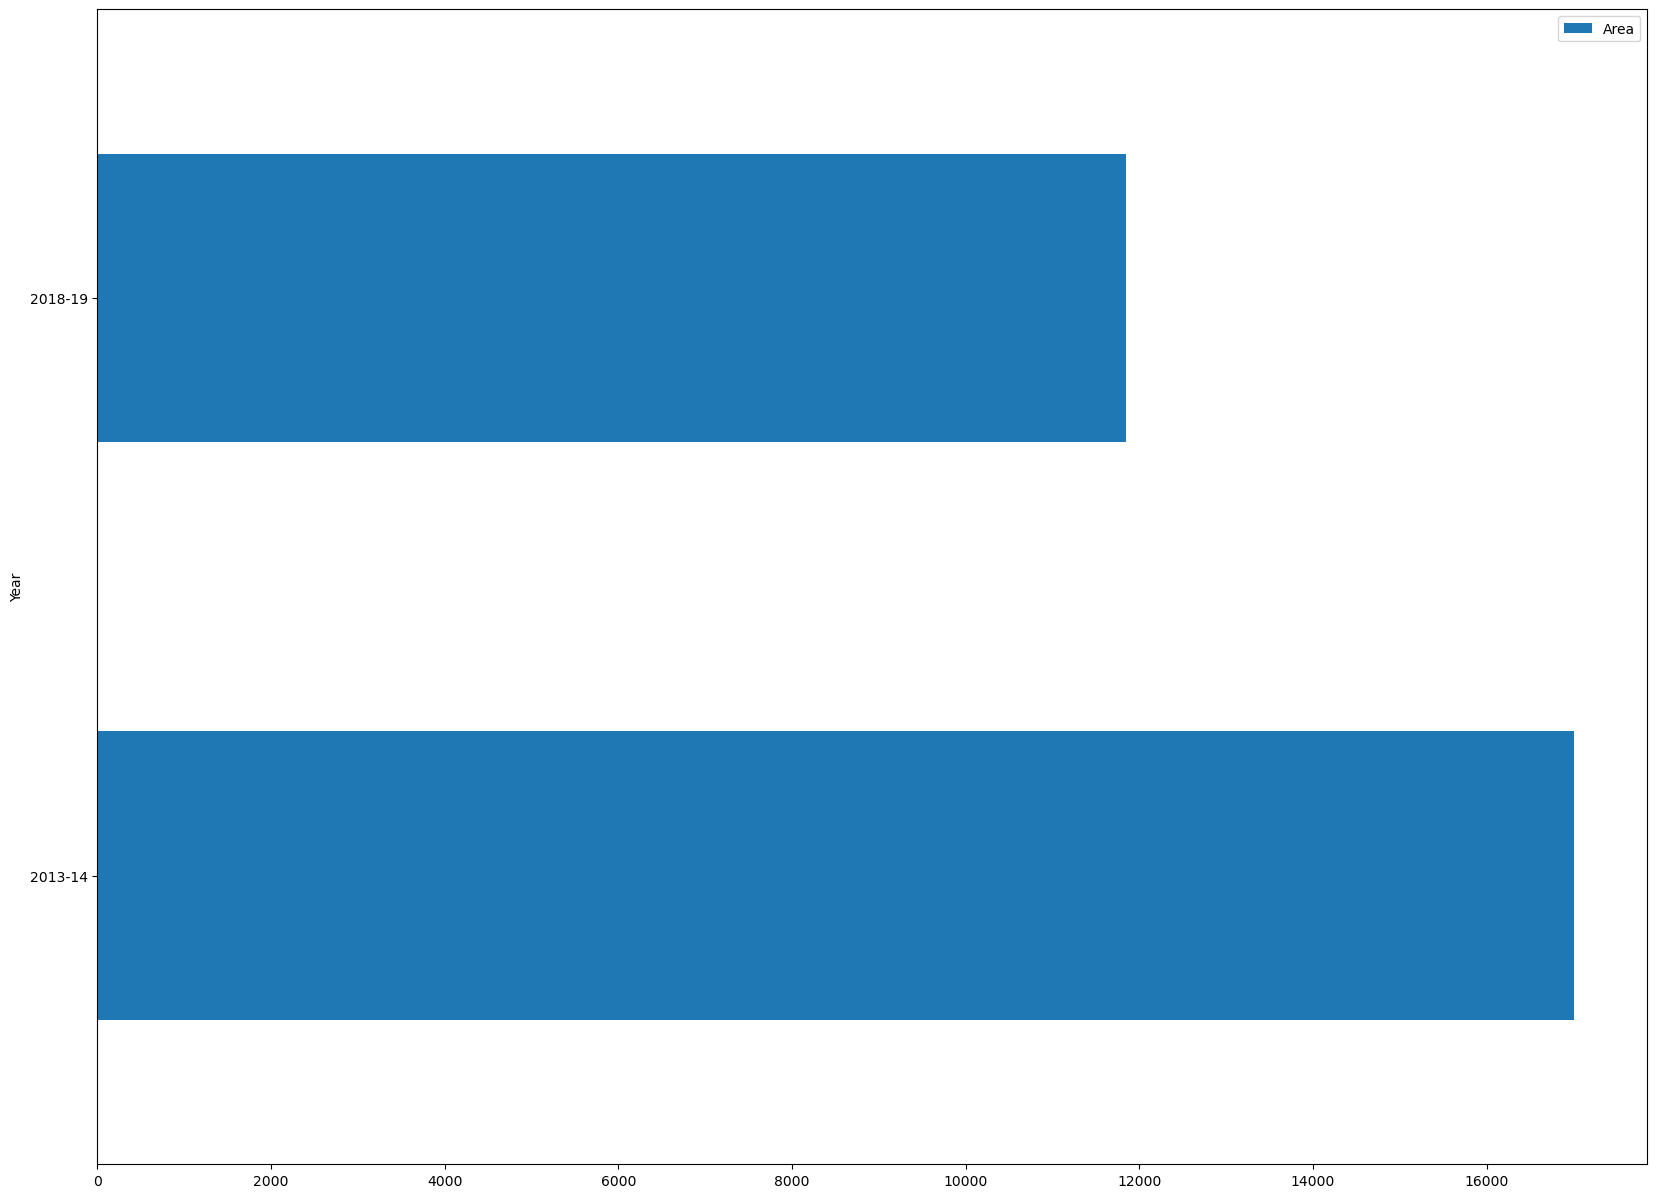

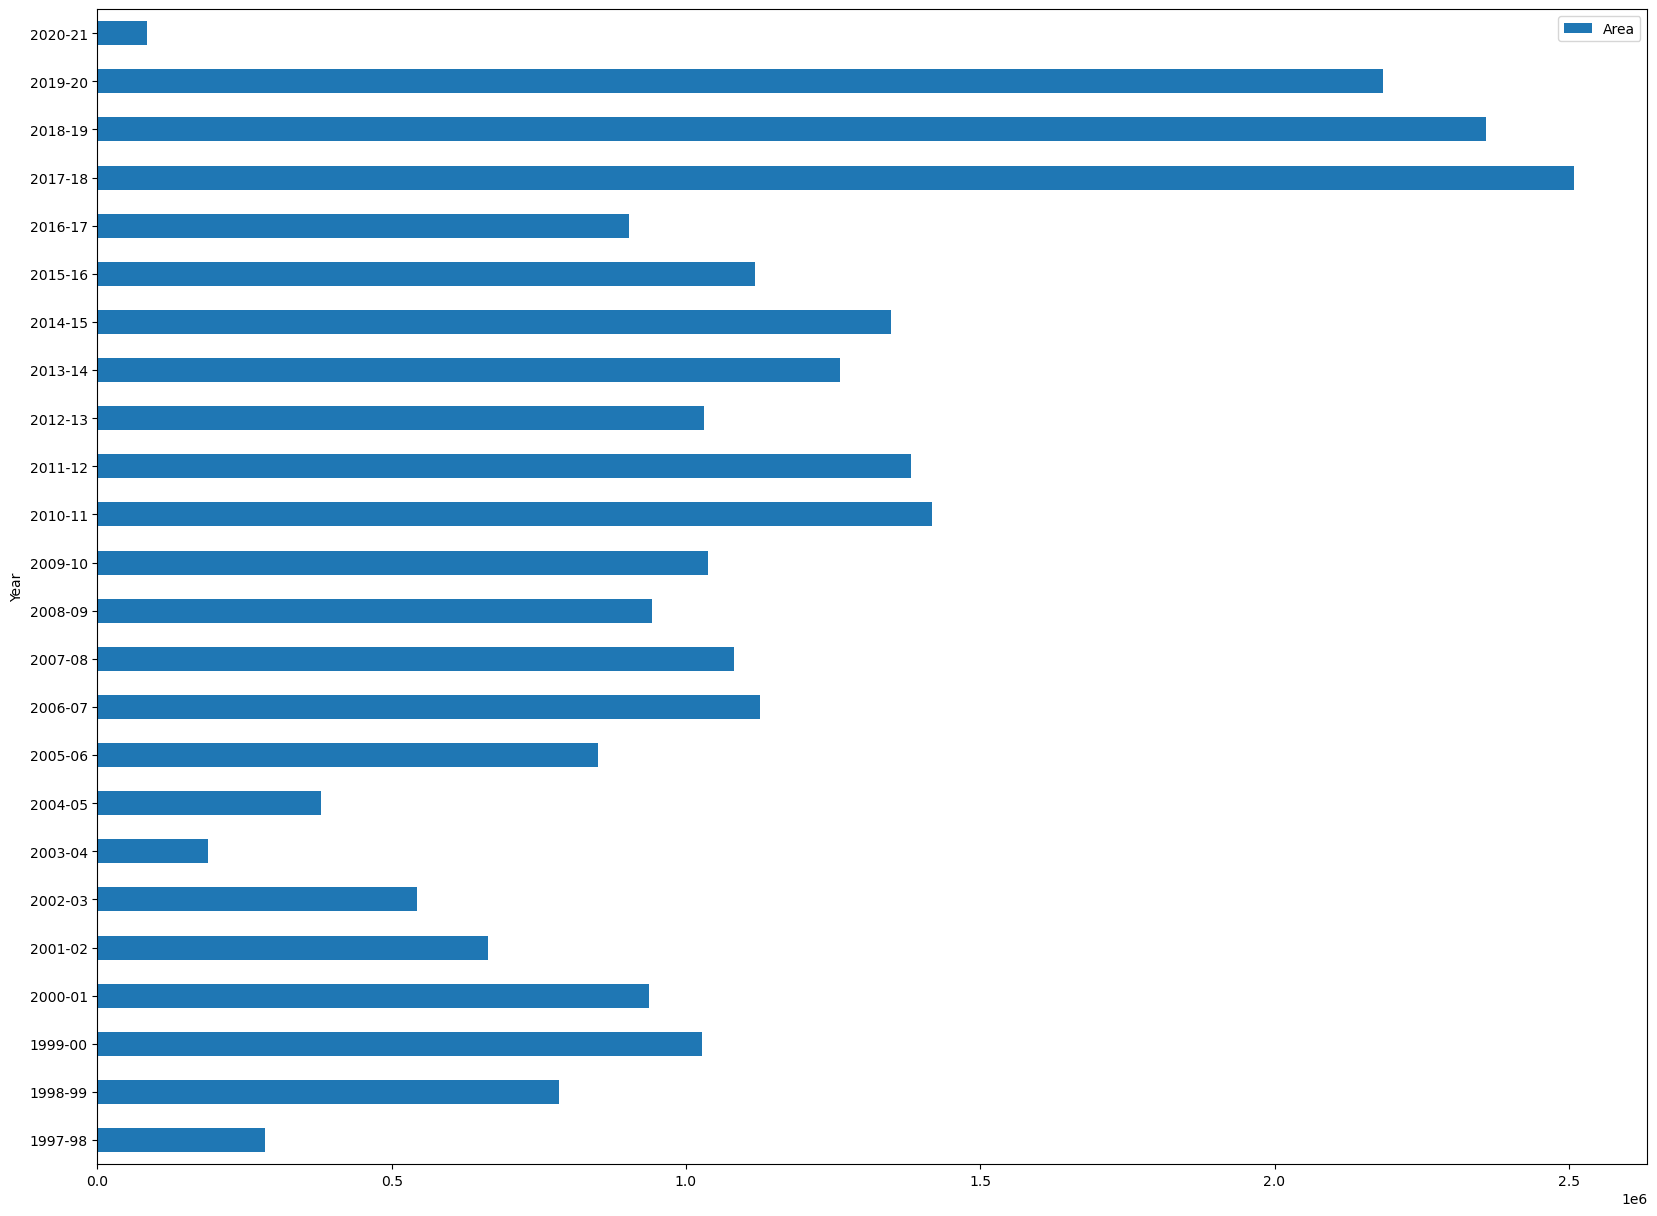

In [41]:
CoconutYA.plot.barh()
BananaYA.plot.barh()
SugarcaneYA.plot.barh()


In [42]:
CoconutYA.info()
BananaYA.info()
SugarcaneYA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 1997-98 to 2019-20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    23 non-null     float64
dtypes: float64(1)
memory usage: 368.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 2013-14 to 2018-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    2 non-null      float64
dtypes: float64(1)
memory usage: 32.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 1997-98 to 2020-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Area    24 non-null     float64
dtypes: float64(1)
memory usage: 384.0+ bytes


In [43]:
M1= pd.merge(Coconut_YA,Banana_YA, how='outer', on='Year' )
M1

,Crop_x,Year,Area_x,Crop_y,Area_y
0,Coconut,2001-02,18190.00,NaN,NaN
1,Coconut,2001-02,48515.00,NaN,NaN
2,Coconut,2001-02,13645.00,NaN,NaN
3,Coconut,2001-02,22287.00,NaN,NaN
4,Coconut,2001-02,25025.00,NaN,NaN
...,...,...,...,...,...
770,Coconut,1997-98,102872.00,NaN,NaN
771,Coconut,1997-98,48929.00,NaN,NaN
772,Coconut,1997-98,22056.00,NaN,NaN
773,Coconut,1997-98,84308.00,NaN,NaN


In [44]:
M2=pd.merge(M1,Sugarcane_YA, how='outer',  on='Year')
M2

,Crop_x,Year,Area_x,Crop_y,Area_y,Crop,Area
0,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,38789.00
1,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,14255.00
2,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,27207.00
3,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,19824.00
4,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,32855.00
...,...,...,...,...,...,...,...
16962,Coconut,1997-98,76656.00,NaN,NaN,Sugarcane,26846.00
16963,Coconut,1997-98,76656.00,NaN,NaN,Sugarcane,19349.00
16964,Coconut,1997-98,76656.00,NaN,NaN,Sugarcane,12141.00
16965,NaN,2020-21,NaN,NaN,NaN,Sugarcane,71501.00


In [45]:
M2.rename(columns={'Crop_x':'Coconut', 'Area_x':'Area_c', 'Crop_y':'Banana','Area_y':'Area_b','Crop':'Sugarcane', 'Area':'Area_s'}, inplace=True)
M2

,Coconut,Year,Area_c,Banana,Area_b,Sugarcane,Area_s
0,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,38789.00
1,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,14255.00
2,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,27207.00
3,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,19824.00
4,Coconut,2001-02,18190.00,NaN,NaN,Sugarcane,32855.00
...,...,...,...,...,...,...,...
16962,Coconut,1997-98,76656.00,NaN,NaN,Sugarcane,26846.00
16963,Coconut,1997-98,76656.00,NaN,NaN,Sugarcane,19349.00
16964,Coconut,1997-98,76656.00,NaN,NaN,Sugarcane,12141.00
16965,NaN,2020-21,NaN,NaN,NaN,Sugarcane,71501.00


<AxesSubplot: >

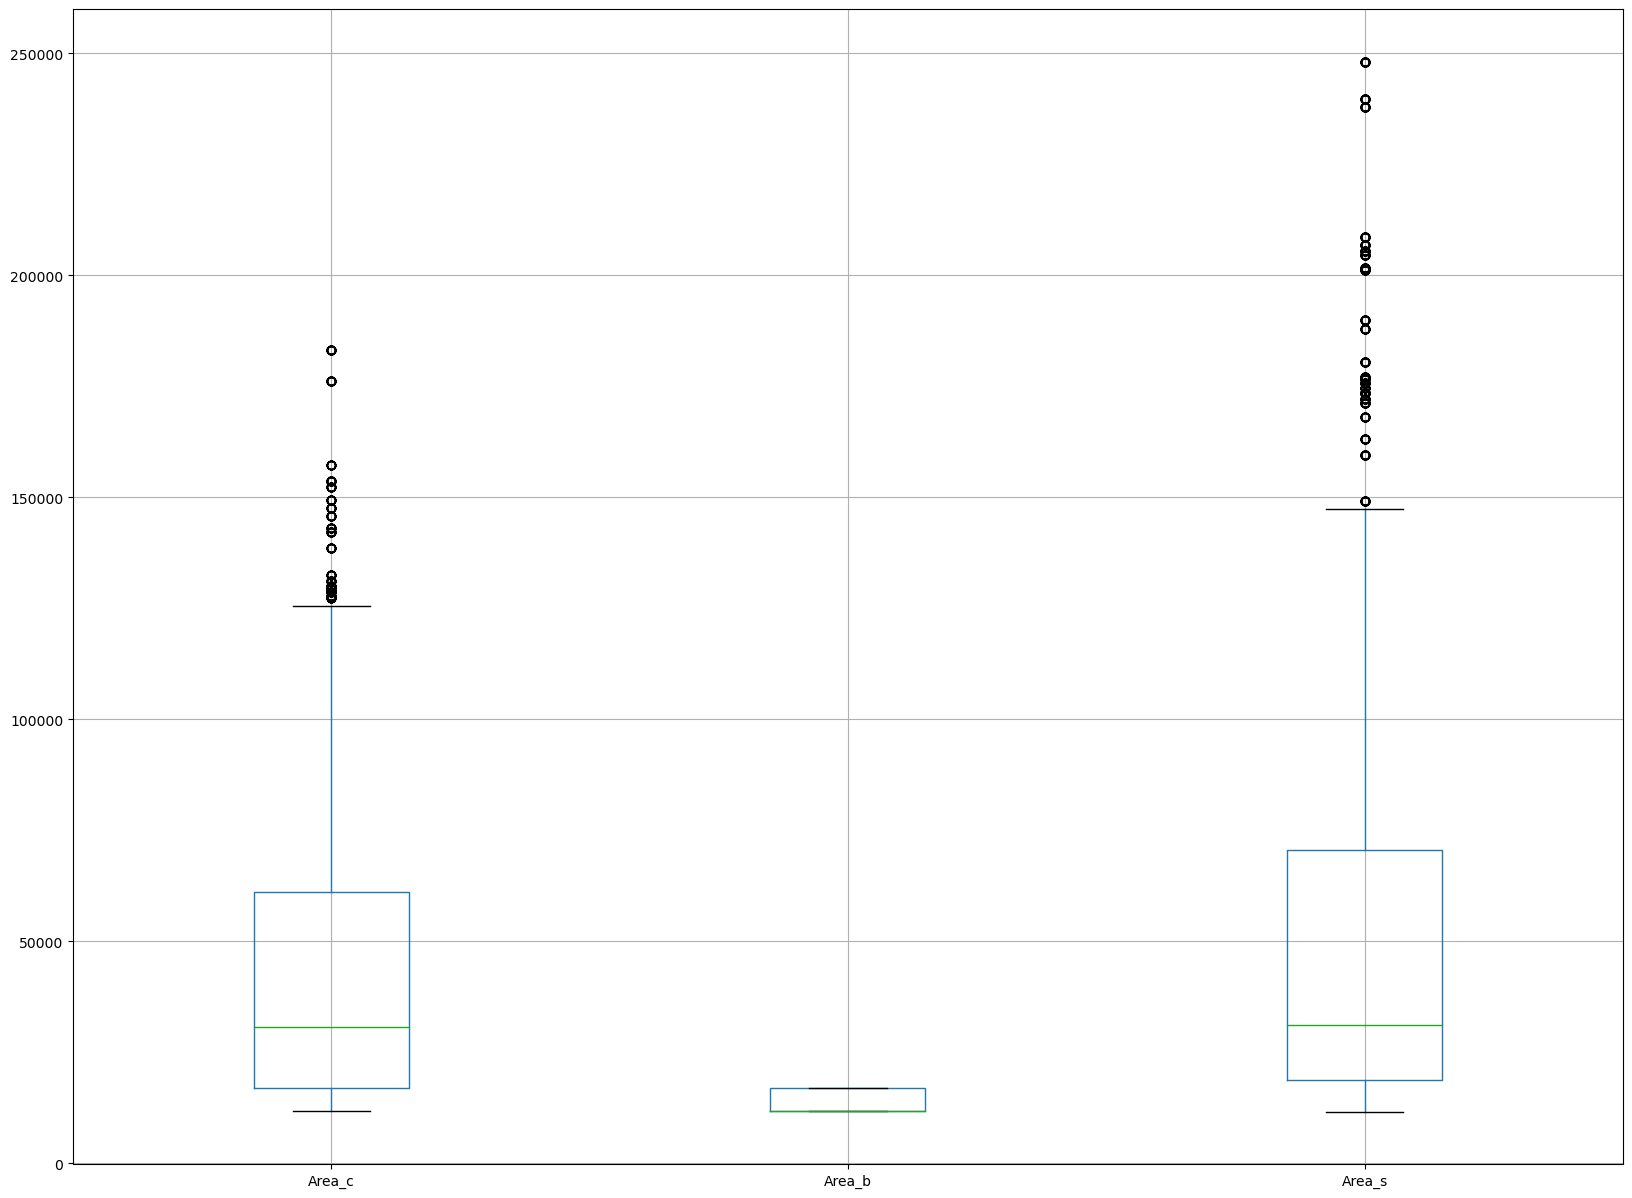

In [46]:
M2.boxplot()

<AxesSubplot: ylabel='Year'>

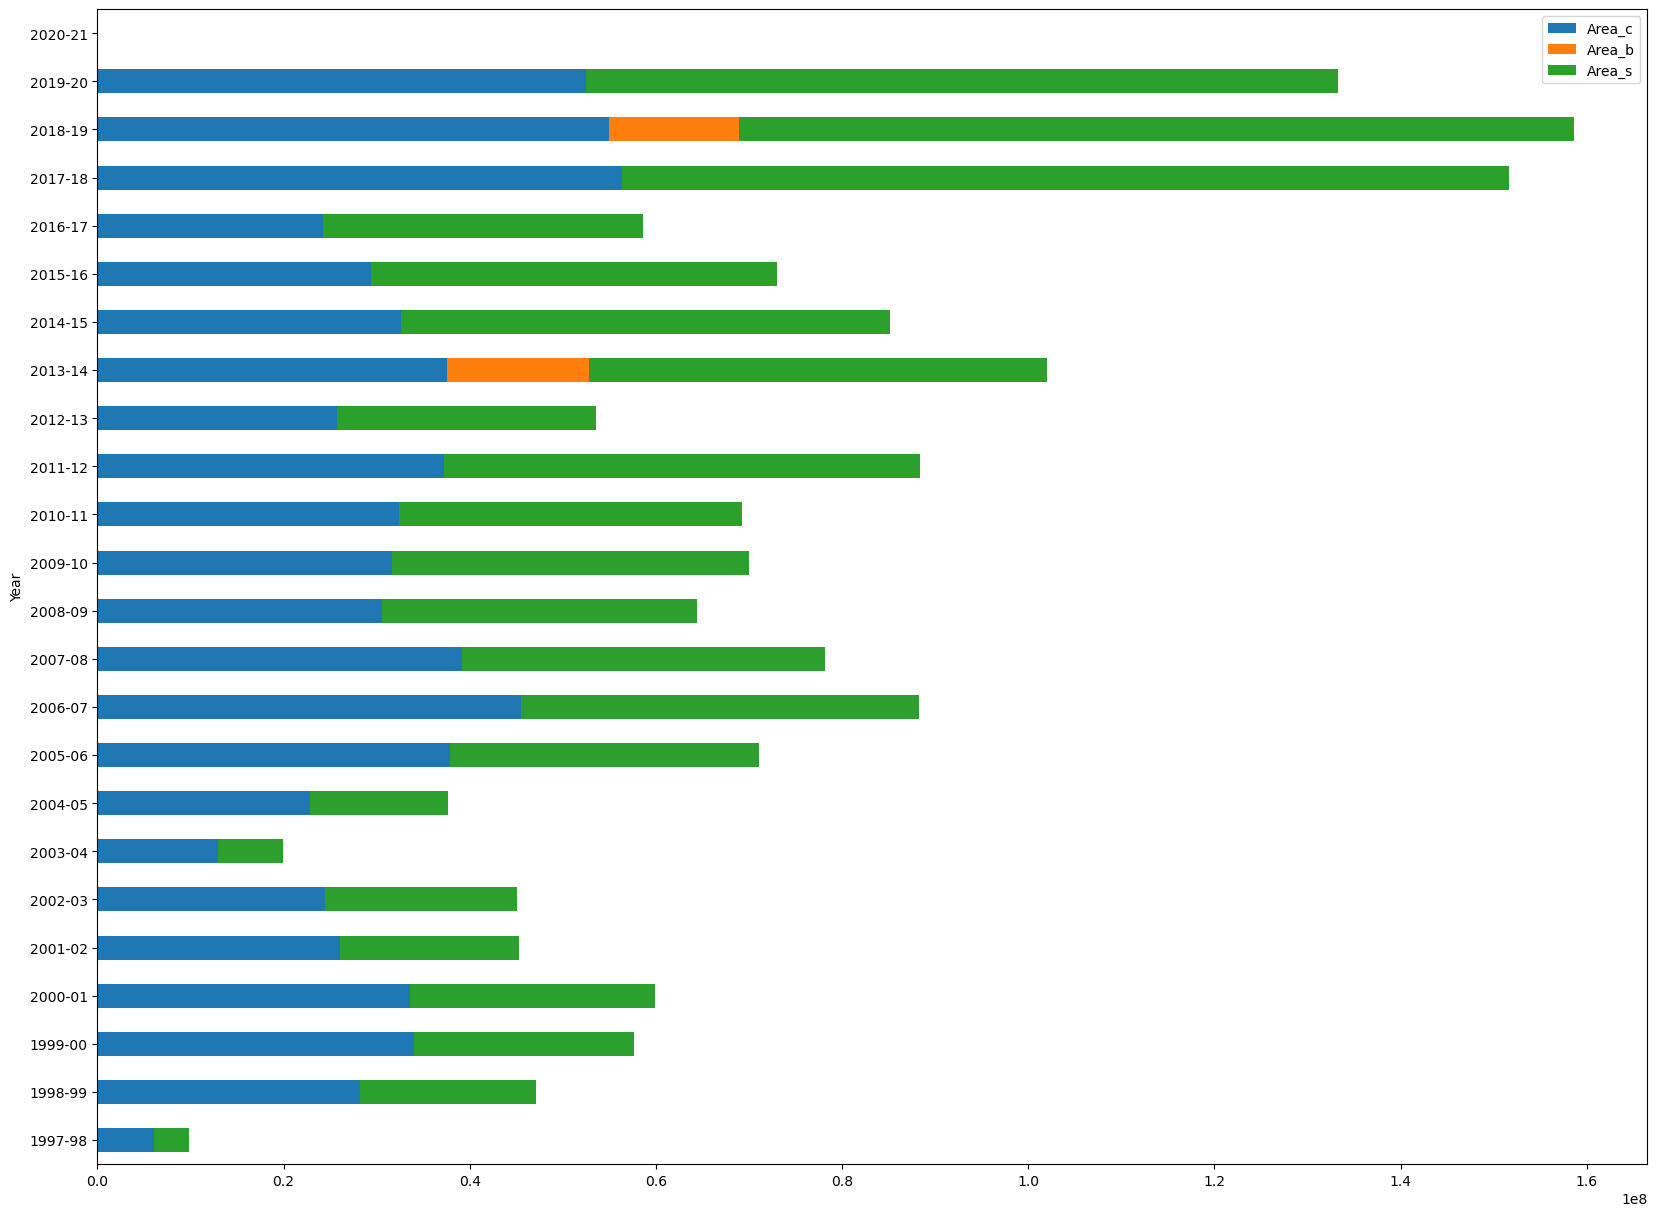

In [51]:
M2.groupby('Year').sum().plot.barh(stacked=True)

<AxesSubplot: ylabel='Frequency'>

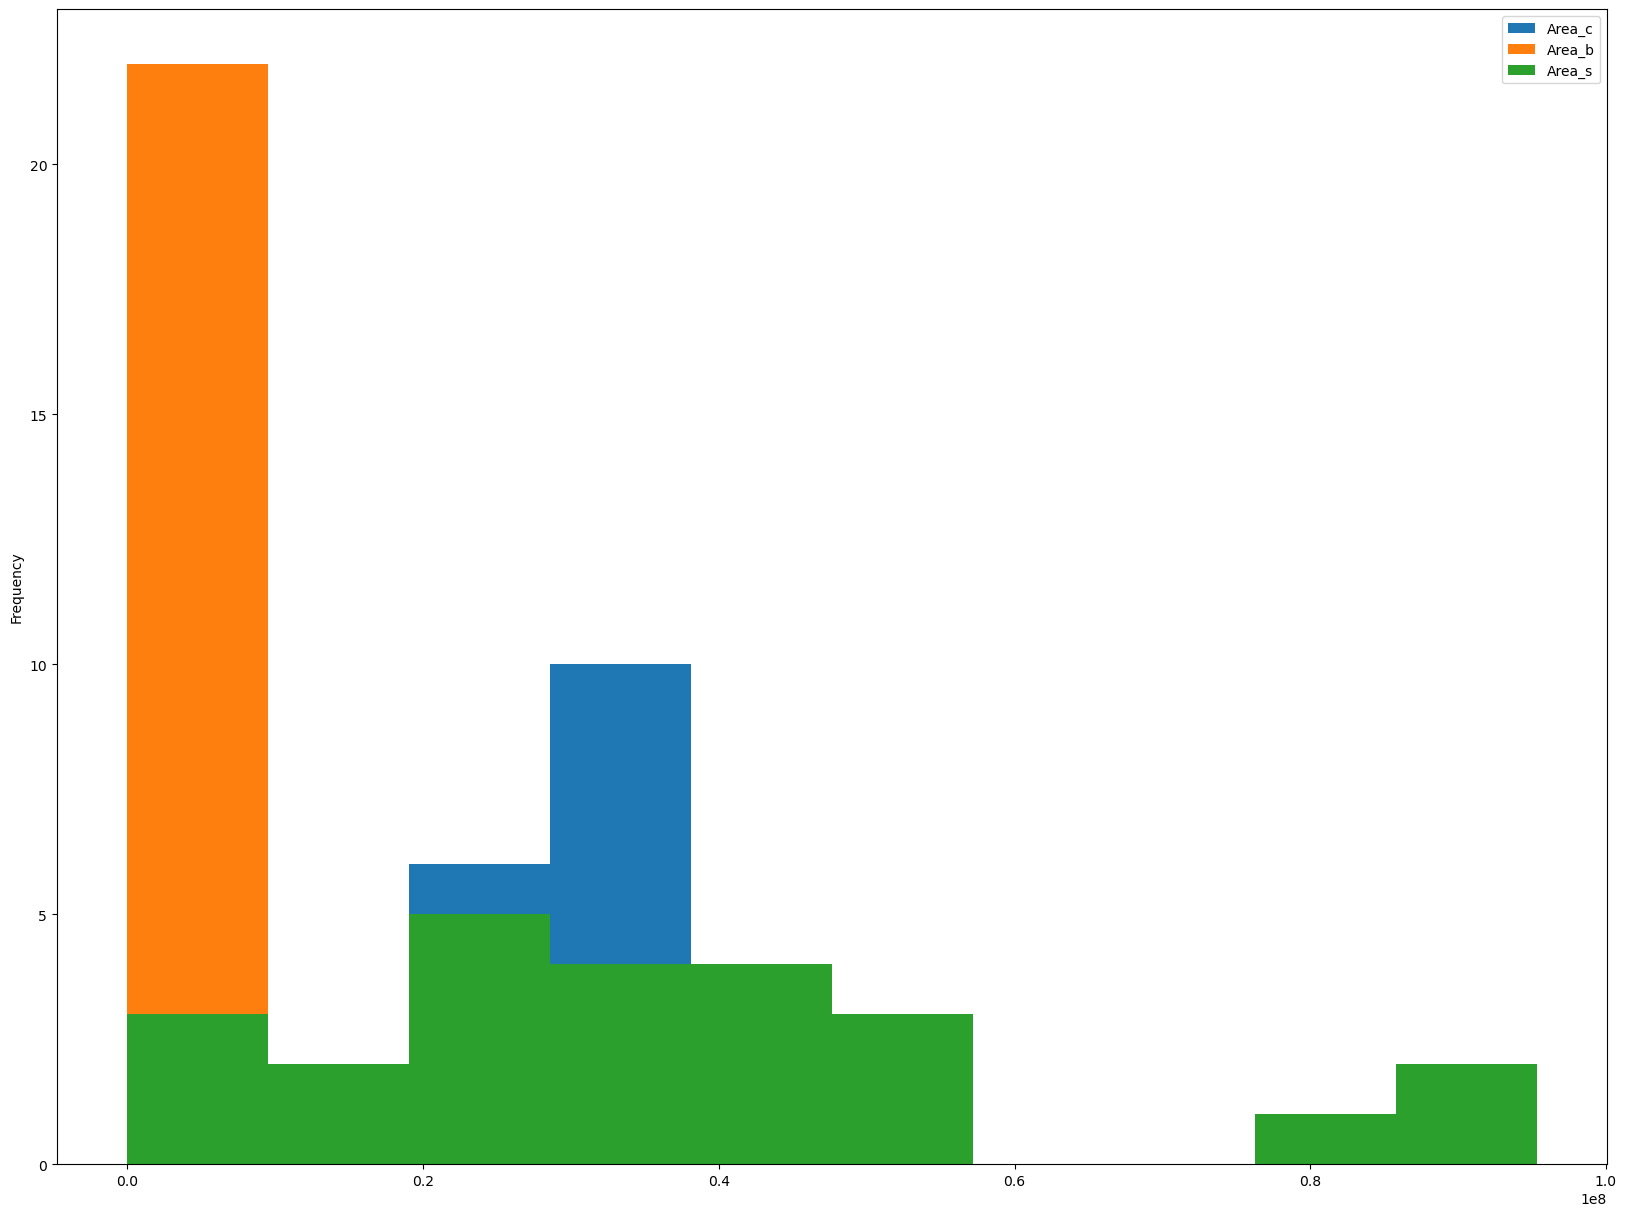

In [52]:
M2.groupby('Year').sum().plot.hist()

<AxesSubplot: ylabel='Area_s'>

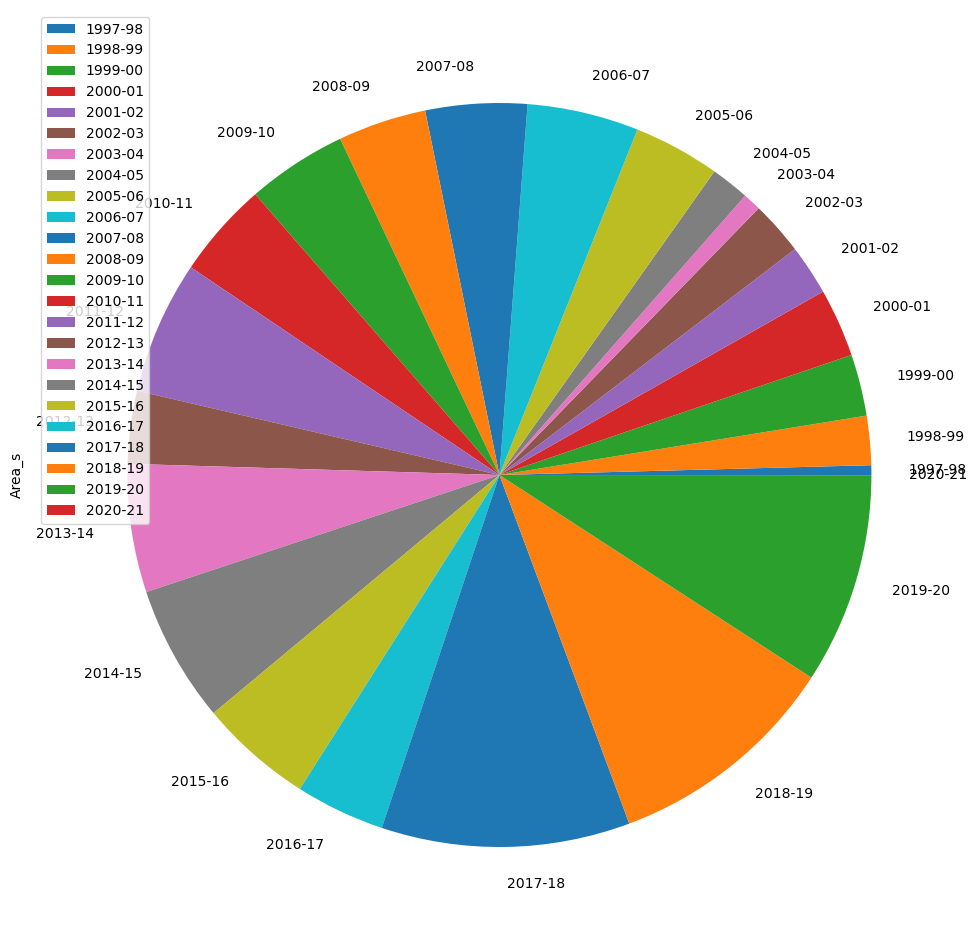

In [65]:
M2.groupby('Year').sum().plot.pie(y='Area_s', figsize=(12,19))